### Packages and Imports

In [1]:
import torch
import pandas as pd
import numpy as np

from datetime import datetime
from matplotlib import pyplot as plt

from utils.instruments import Stock, RiskFactor
from utils.data_handler import YahooDataHandler
from models.ar import AR
from models.garch import GARCH

%config InlineBackend.figure_format = 'retina'
plt.style.use(['science', 'notebook', 'grid'])

### Financial Data

In [2]:
ydh = YahooDataHandler()

ticker = "GS"

# Start and end dates.
start = datetime.strptime("2005-05-01", r"%Y-%m-%d")
end = datetime.strptime("2023-06-01", r"%Y-%m-%d")

price_history = ydh.get_price_history(ticker, start, end)
identifier = f"{ticker}_RF"
risk_factor = RiskFactor(identifier, price_history)
stock = Stock(identifier=ticker, risk_factors=[risk_factor])

data = risk_factor.price_history.log_returns

[*********************100%***********************]  1 of 1 completed


In [3]:
ar_model = AR(data)
ar_model.calibrate()
print(ar_model.parameters)

[-0.05507313832640648, 0.003895258530974388, 0.0003181590873282403, 0.022512581199407578]


In [4]:
ar_model.aic

tensor(-54072.6602)

In [5]:
ar_model.bic

tensor(-54046.9688)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

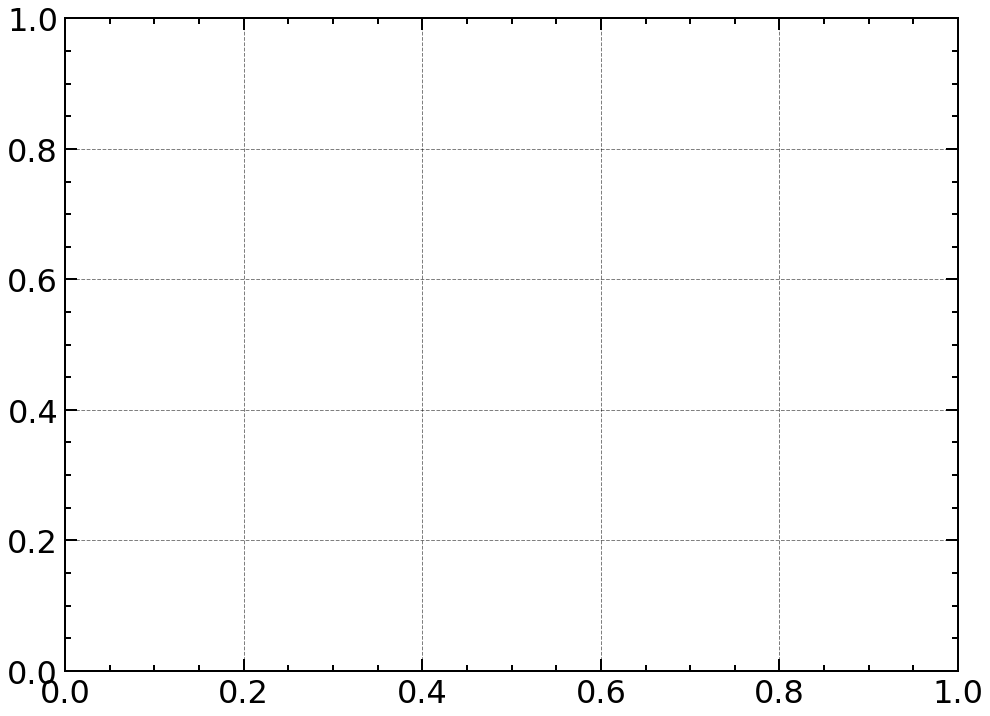

In [6]:
garch_model = GARCH(data)
garch_model.calibrate()

In [ ]:
parameters = garch_model._solution.x
parameters = garch_model._uncondition_parameters(parameters)
parameters

array([0.07986214, 0.90859563])

In [ ]:
garch_model._solution

      fun: -32102.429028866623
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.0007276 , -0.01818989])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 30
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([4.45594381, 2.47401689])

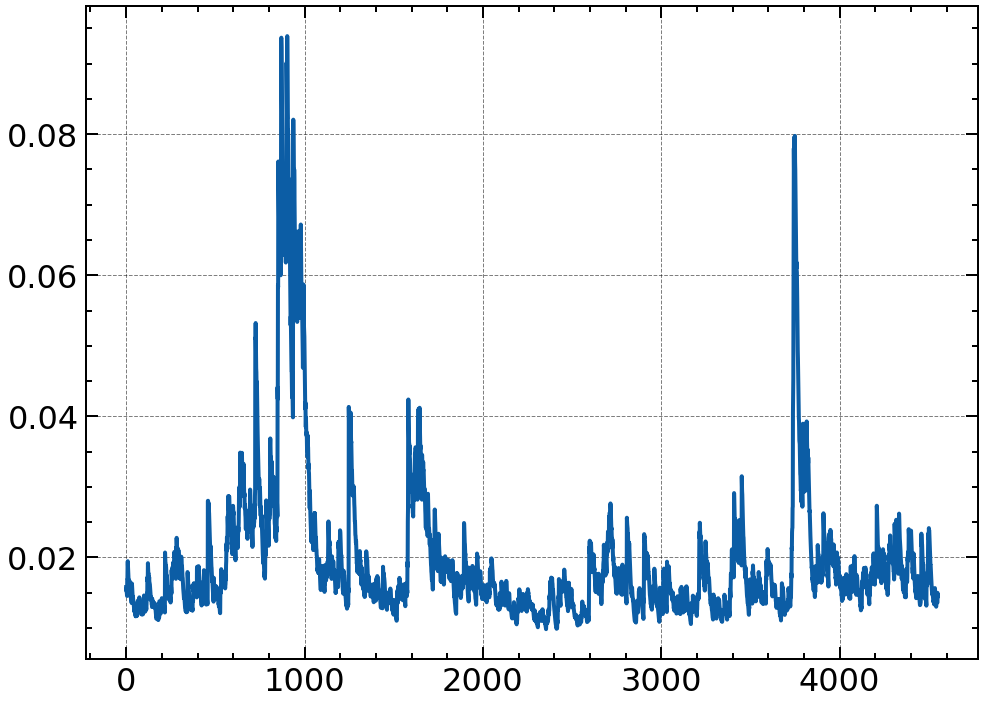

array([0.00024957, 0.00023267, 0.00024324, ..., 0.00018592, 0.00022386,
       0.00021026])

In [ ]:
garch_model._compute_variance(garch_model._solution.x)